# Bank marketing campaigns dataset analysis

### Abstract
This is dataset that describe Portugal bank marketing campaigns results. 
Conducted campaigns were based mostly on direct phone calls, offering  bank's clients to place a term deposit. 
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

Sourse of the data
https://archive.ics.uci.edu/ml/datasets/bank+marketing

**Citation:**
> S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

###  Description of dataset
There are 41188 observations with 21 features
**Bank client data:**
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

***Related with the last contact of the current campaign:***
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

***other attributes:***
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

***social and economic context attributes***
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

***Output variable (desired target):***
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Project description
We are going to perform analysis in topic 6: Classification / Decision and Regression Trees. We will use Random Forest and Decision Tree to do classification for y (has the client subscribed a term deposit?) in this dataset and comapre their performance.

### Approach

The following steps will be performed to complete the project:
1. Process data and Expanatory Data Analysis (EDA)
2. Data preparation for modeling
3. Visualization of Random Forest and Decision Tree
4. Cross Validation and Grid Search
5. Comparision of the performance of Random Forest and Decision Tree
6. Conclusions

# 1. Process data and Expanatory Data Analysis (EDA)

### Import libraries 

In [145]:
import pandas as pd
import numpy as np
import time
import gc
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

### Loading data and holding a short Expanatory Data Analysis

In [146]:
# Process data
data = pd.read_csv('../../data/bank-additional-full.csv', sep=';')
display(data.head(5))
display('There are {} observations with {} features'.format(data.shape[0], data.shape[1]))

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

'There are 41188 observations with 21 features'

###  Explore categorical variables in the dataset (EDA)

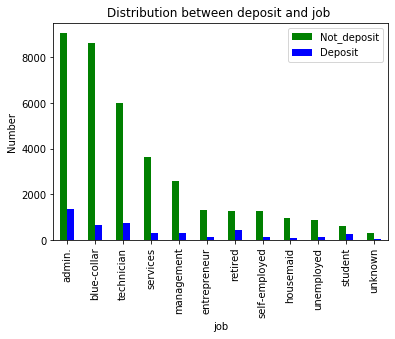

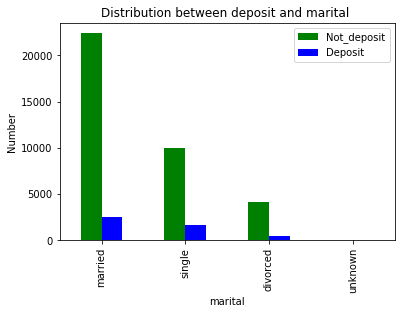

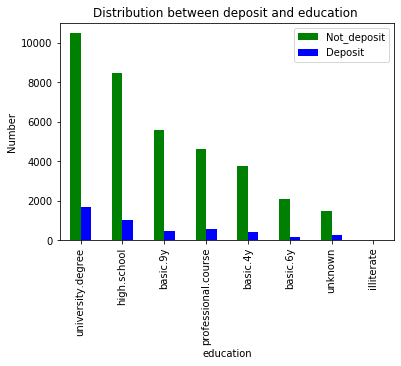

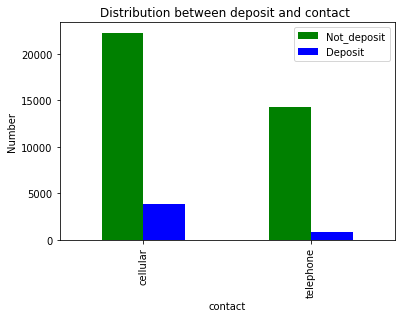

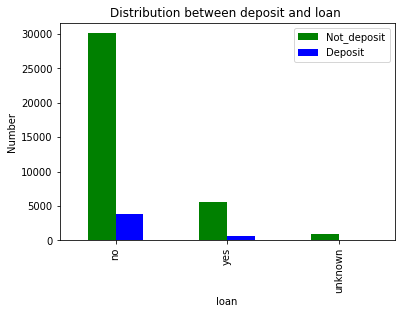

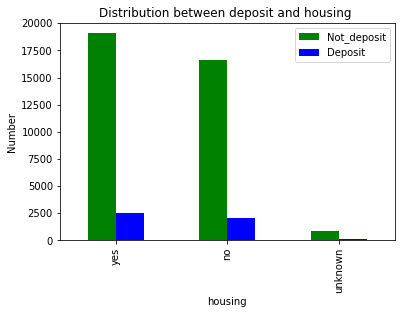

(None, None, None, None, None, None)

In [147]:
# Function of plotting the categorical values disribution
def plot_bar(column):
    temp = pd.DataFrame()  #create a tremp dataframe
    temp['Not_deposit'] = data[data['y'] == 'no'][column].value_counts() # count the value when y = no
    temp['Deposit'] = data[data['y'] == 'yes'][column].value_counts() # count the value when y = yes
    temp.plot(kind='bar',color=["green","blue"])
    plt.title('Distribution between deposit and {} '.format(column))
    plt.xlabel(f'{column}')
    plt.ylabel('Number')
    plt.show();

plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

**Summary:**  

* From the first graph, we can see that when the job types are admin, blue-collar and technician, they open the deposit most. When the job types are retired and student, the proportions of opening the deposit are high as well.

* From the second graph, we can see that when the marital state is married, they open the deposit most. When the marital state is single, the proportion of opening the deposit is highest.

* From the third graph, we can see that people with higher educated level will open the deposit in a higher proportion

* From the fourth graph, we can see that opening deposit will not affect by loan, the proportion are similar

* From the fifth graph, we can see that opening deposit will not affect by loan, the proportion are similar

* From the sixth graph, we can see that opening deposit will not affect by housing, the proportion are similar

### Explore numerical variables in the dataset (EDA)

In [148]:
# Convert target into binary number
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

# Correlation matrix of numerical variables
corr = data.corr()
corr.style.background_gradient(cmap='YlOrRd')

**Summary:** 
* Duration is highest correlated with target feature(0.4053)
* Employment rate, consumer confidence index, consumer price index is higly correlated as well.

# 2. Data preparation for modeling

Since this dataset contain lot of categorical variables and the number of weakly correlated numeric variables is small, we, therefore, use one hot encoding or replace categorical variables with binary number. 

For job, marital, education, month, day_of_week, we will use one hot encoding to transform these variables since they have more than 3 types of possible option.

Also, for those missing data, like 'unknow' and 'nonexistent', we use take it as 0 in gerneral.

In [149]:
# Fucntion of One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

# Replacing values with binary number
data.contact = data.contact.map({'cellular': 0, 'telephone': 1}).astype('uint8') 
data.loan = data.loan.map({'unknown': 0, 'no' : 0, 'yes': 1}).astype('uint8')
data.default = data.default.map({'unknown': 0,'no': 0, 'yes': 1}).astype('uint8')
data.housing = data.housing.map({'unknown': 0, 'no' : 0,'yes': 1}).astype('uint8')

# binary if were was an outcome of marketing campane
data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

# One Hot encoding of 3 variable 
data = encode(data, data.job)
data = encode(data, data.month)
data = encode(data, data.day_of_week)

# Drop tranfromed features
data.drop(['job','month', 'day_of_week'], axis=1, inplace=True)

'''Drop the dublicates'''
data.drop_duplicates(inplace=True) 

# Save target variable as y
y = data.y
# Create target encoder object and transoform marital and education
target_encode = ce.target_encoder.TargetEncoder(cols=['marital', 'education']).fit(data, y)
dataset_prepared = target_encode.transform(data)
# Drop target variable
dataset_prepared.drop('y', axis=1, inplace=True)

display(dataset_prepared.head(5))
display('There are {} observations with {} features in the prepared dataset'.format(dataset_prepared.shape[0], dataset_prepared.shape[1]))

age   marital  education  default  housing  loan  contact  duration  \
0   56  0.101569   0.102515        0        0     0        1       261   
1   57  0.101569   0.108389        0        0     0        1       149   
2   37  0.101569   0.108389        0        1     0        1       226   
3   40  0.101569   0.082060        0        0     0        1       151   
4   56  0.101569   0.108389        0        0     1        1       307   

   campaign  pdays  ...  month_mar  month_may  month_nov  month_oct  \
0         1    999  ...          0          1          0          0   
1         1    999  ...          0          1          0          0   
2         1    999  ...          0          1          0          0   
3         1    999  ...          0          1          0          0   
4         1    999  ...          0          1          0          0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1                0   
1          0                0                1                0   
2          0                0                1                0   
3          0                0                1                0   
4          0                0                1                0   

   day_of_week_tue  day_of_week_wed  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 44 columns]

'There are 41174 observations with 44 features in the prepared dataset'

### Splitting training dataset and testing dataset

In [150]:
# Set global random seed
random_state=4002
# split data
x_train, x_test, y_train, y_test = train_test_split(dataset_prepared, y, test_size=0.2,random_state=random_state)

display('The shape of splitted training dataset and testing dataset', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

'The shape of splitted training dataset and testing dataset'

(32939, 44)

(32939,)

(8235, 44)

(8235,)

# 3. Visualization of Random Forest and Decision Tree

### Plot of the simplified Decision Tree

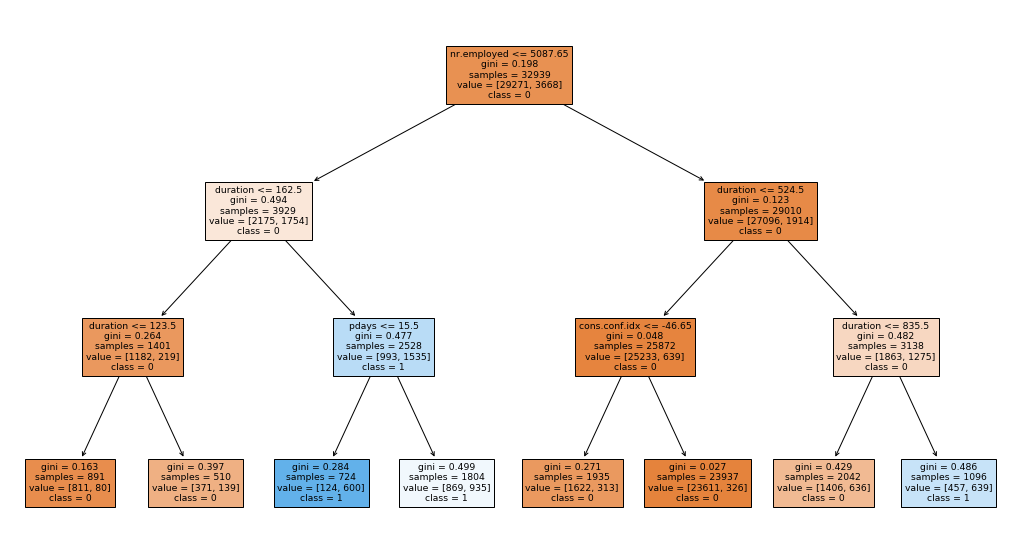

In [151]:
#Set max_depth = 3 to keep the size of the tree small for ploting graph
dt = tree.DecisionTreeClassifier(max_depth=3,random_state=random_state)
dt = dt.fit(x_train, y_train)
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(dt,feature_names=dataset_prepared.columns,class_names=["0","1"], filled=True)

### Text report of rules of the simplified Decision Tree

In [8]:
r = tree.export_text(dt, feature_names=list(dataset_prepared.columns))
print(r)

|--- nr.employed <= 5087.65
|   |--- duration <= 162.50
|   |   |--- duration <= 123.50
|   |   |   |--- class: 0
|   |   |--- duration >  123.50
|   |   |   |--- class: 0
|   |--- duration >  162.50
|   |   |--- pdays <= 15.50
|   |   |   |--- class: 1
|   |   |--- pdays >  15.50
|   |   |   |--- class: 1
|--- nr.employed >  5087.65
|   |--- duration <= 524.50
|   |   |--- cons.conf.idx <= -46.65
|   |   |   |--- class: 0
|   |   |--- cons.conf.idx >  -46.65
|   |   |   |--- class: 0
|   |--- duration >  524.50
|   |   |--- duration <= 835.50
|   |   |   |--- class: 0
|   |   |--- duration >  835.50
|   |   |   |--- class: 1



### Plot of the simplified Random Forest

In [9]:
#Set max_depth = 3 to keep the size of the tree small for ploting graph
rf = RandomForestClassifier(max_depth = 3, n_estimators=10,
                            random_state=random_state)
rf = rf.fit(x_train, y_train)

# Plot 3 trees of the Forest
fig, axes = plt.subplots(nrows = 3,ncols = 1,figsize = (10,10), dpi=1000)
for index in range(0, 3):
    fig = plt.figure(figsize=(10,10))
    _ = tree.plot_tree(rf.estimators_[index],feature_names=dataset_prepared.columns,
                       class_names=["0","1"], filled=True, ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### Plot of the simplified Logistic Regression by 'duration'

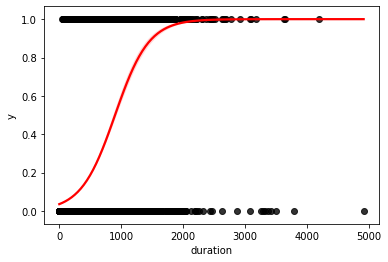

In [164]:
sns.regplot(x='duration', y = y, data=dataset_prepared, logistic=True,scatter_kws={"color": "black"}, line_kws={"color": "red"})

# 4. Cross Validation and Grid Search procedures

In [165]:
# RandomForestClassifier
RandomForest = Pipeline([('rf', RandomForestClassifier(n_jobs=-1,random_state=random_state))])

# DecisionTreeClassifier
DecisionTree = Pipeline([('dt', tree.DecisionTreeClassifier(max_features='auto',random_state=random_state))])

# LogisticRegressionClassifier
LogisticReg = Pipeline([('lr', LogisticRegression(random_state=random_state, n_jobs=-1, max_iter=500))])

# Set number of Cross Validation
cv = StratifiedKFold(shuffle=True, n_splits=5,random_state=random_state)

# Set parameters for RandomForestClassifier and DecisionTreeClassifier
rf_params = [{  'rf__criterion': ['gini'],
                'rf__min_samples_leaf': [60, 80, 100], #The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model
                'rf__max_depth': [23, 25, 27], #The maximum depth of the tree. 
                'rf__min_samples_split': [1, 3, 5], #The minimum number of samples required to split an internal node
                'rf__n_estimators' : [30, 50, 70]}] # The number of trees in the forest.


dt_params = [{  'dt__criterion': ['gini'],
                'dt__max_depth': [8, 10, 12],
                'dt__min_samples_leaf': [1, 3, 5, 7]}]


lr_params = [{ 'lr__penalty': ['l1', 'l2', 'elasticnet'], #the norm of the penalty
                'lr__C': [0.3, 0.6, 0.7],
                'lr__solver': ['saga']}] #For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss




#  Set parameters for Grid Search of RandomForestClassifier and DecisionTreeClassifier
gs_rf = GridSearchCV(RandomForest, param_grid=rf_params,
                     scoring='accuracy', cv=cv)

gs_dt = GridSearchCV(DecisionTree, param_grid=dt_params,
                     scoring='accuracy', cv=cv)

gs_lr = GridSearchCV(LogisticReg, param_grid=lr_params,
                     scoring='accuracy', cv=cv) 


# Models used
model_used = [gs_rf, gs_dt, gs_lr]
model_name = { 0:'RandomForest', 1:'DecisionTree', 2:'Logistic_reg'}

## Plot the Cross Validation

In [166]:
split_text=  ['split'+str(num)+'_test_score' for num in range(5)]

com_rf=gs_rf.fit(x_train, y_train)
index=np.where(com_rf.cv_results_['rank_test_score']==1)[0][0]
x=list()
for i in split_text:
    x.append(com_rf.cv_results_[i][index])

com_dt=gs_dt.fit(x_train, y_train)
index=np.where(com_dt.cv_results_['rank_test_score']==1)[0][0]
y=list()
for i in split_text:
    y.append(com_dt.cv_results_[i][index])    

com_lr=gs_lr.fit(x_train, y_train)
index=np.where(com_lr.cv_results_['rank_test_score']==1)[0][0]
z=list()
for i in split_text:
    z.append(com_lr.cv_results_[i][index]) 
    
fold=np.stack([x,y,z],axis=0)

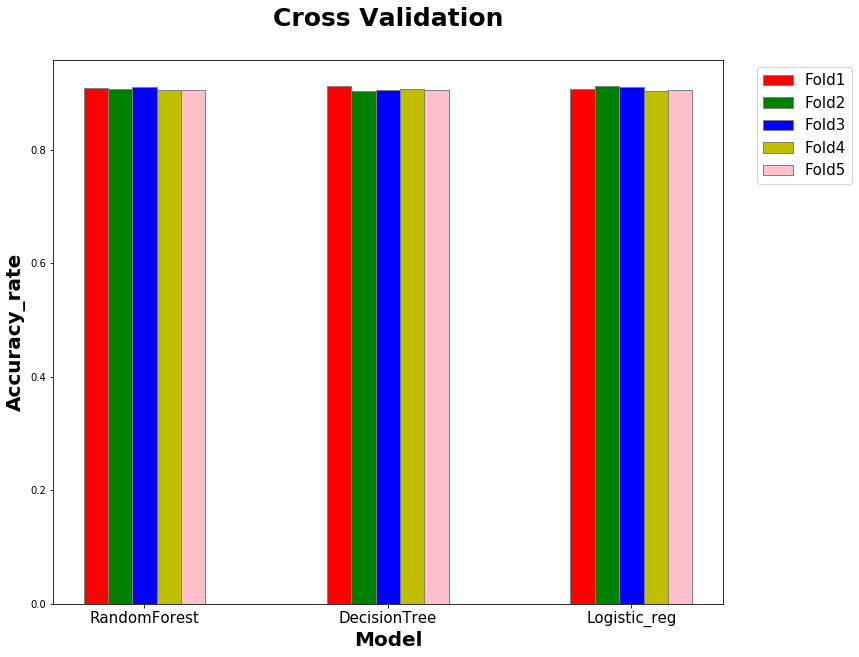

In [167]:
Fold1=fold[:,0]
Fold2=fold[:,1]
Fold3=fold[:,2]
Fold4=fold[:,3]
Fold5=fold[:,4]
# set width of bar
barWidth = 0.05
fig = plt.subplots(figsize =(12, 10))

# Set position of bar on X axis
br1 = (0,0.5,1)
br2 = [i + barWidth for i in br1]
br3 = [j + barWidth for j in br2]
br4 = [k + barWidth for k in br3]
br5 = [l + barWidth for l in br4]
 
# Make the plot
plt.bar(br1, Fold1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Fold1')
plt.bar(br2, Fold2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Fold2')
plt.bar(br3, Fold3, color ='b', width = barWidth,
        edgecolor ='grey', label ='Fold3')
plt.bar(br4, Fold4, color ='y', width = barWidth,
        edgecolor ='grey', label ='Fold4')
plt.bar(br5, Fold5, color ='pink', width = barWidth,
        edgecolor ='grey', label ='Fold5')
 
# Adding Xticks
plt.xlabel('Model', fontweight ='bold', fontsize = 20)
plt.ylabel('Accuracy_rate', fontweight ='bold', fontsize = 20)
plt.xticks([r + 0.1 for r in (0,0.5,1)],
        ['RandomForest', 'DecisionTree', 'Logistic_reg'], fontsize = 15)
 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 15)
plt.title('Cross Validation\n', fontweight ='bold', fontsize = 25)
plt.show()


## Compute the result

Using RandomForest model
traing accuracy rate is 0.907343824273843
best parms is {'rf__criterion': 'gini', 'rf__max_depth': 23, 'rf__min_samples_leaf': 60, 'rf__min_samples_split': 3, 'rf__n_estimators': 70}
Accuracy: 0.9028536733454766
Precision: 0.6734279918864098
Recall: 0.3419155509783728
ROC_AUC: 0.9373493622315883
It requires 636.48 sec to compute

Using DecisionTree model
traing accuracy rate is 0.9067669995240945
best parms is {'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_leaf': 5}
Accuracy: 0.9006678809957499
Precision: 0.7084468664850136
Recall: 0.26776519052523173
ROC_AUC: 0.9057758277492208
It requires 2.73 sec to compute

Using Logistic_reg model
traing accuracy rate is 0.9074045361191928
best parms is {'lr__C': 0.3, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Accuracy: 0.8948391013964785
Precision: 0.5766423357664233
Recall: 0.40679711637487126
ROC_AUC: 0.9029760919076114
It requires 331.98 sec to compute



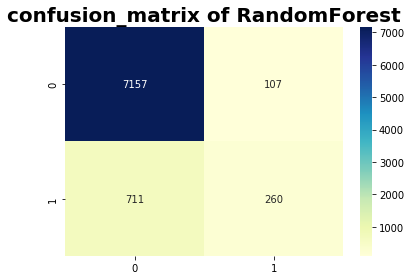

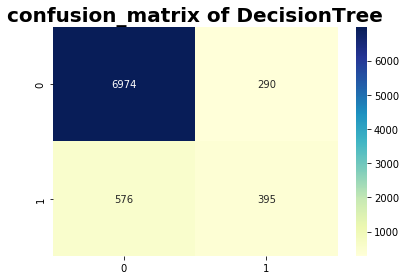

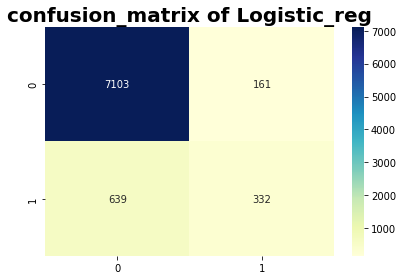

In [171]:
# Set temp
Accuracy = {}
Precision = {}
Recall = {}
auc_rate = {}
models = []
time_used={}

# Record the time used, accuracy rate and ROC rate
for index, model in enumerate(model_used):
        start = time.time()
        print('Using {} model'.format(model_name[index]))
        model.fit(x_train, y_train)
        print('traing accuracy rate is {}'.format(model.best_score_))
        print('best parms is {}'.format(model.best_params_))
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        print("Precision:",metrics.precision_score(y_test, y_pred))
        print("Recall:",metrics.recall_score(y_test, y_pred))
        auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
        print("ROC_AUC:",auc)
        y_pred=model.predict(x_test)
        from sklearn import metrics
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
        cnf_matrix
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        plt.title('confusion matrix of {}'.format(model_name[index]),fontweight ='bold', fontsize = 20)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        
        plt.tight_layout()
        end = time.time()
        print('It requires {} sec to compute'.format(round(end - start, 2)))
        print()
        
        models.append(model.best_estimator_)
        auc_rate[index] = auc
        Accuracy[index] = metrics.accuracy_score(y_test, y_pred)
        Precision[index] = metrics.precision_score(y_test, y_pred)
        Recall[index] = metrics.recall_score(y_test, y_pred)
        time_used[index] = round(end - start, 2)

# 5. Comparision of the performance of Random Forest and Decision Tree

### Table of accuracy rate, ROC rate and time used for comparision

In [174]:
pd.DataFrame(list(zip(model_name.values(), Accuracy.values(),Precision.values(),Recall.values(), auc_rate.values(),time_used.values())), \
                  columns=['Model_used', 'Accuracy','Precision','Recall','ROC_rate','Time_used'])

Model_used  Accuracy  Precision    Recall  ROC_rate  Time_used
0  RandomForest  0.900668   0.708447  0.267765  0.937349     636.48
1  DecisionTree  0.894839   0.576642  0.406797  0.905776       2.73
2  Logistic_reg  0.902854   0.673428  0.341916  0.902976     331.98

### Plot ROC graph

In [175]:
def plot_ROC(fpr, tpr, threshold,model):
    trace0 = go.Scatter(x=fpr[0], y=tpr[0], text=threshold[0], fill='tozeroy', name='ROC Curve of {} '.format(model[0]))
    trace1 = go.Scatter(x=fpr[1], y=tpr[1], text=threshold[1], fill='tozeroy', name='ROC Curve of {} '.format(model[1]))
    trace2 = go.Scatter(x=fpr[2], y=tpr[2], text=threshold[2], fill='tozeroy', name='ROC Curve of {} '.format(model[2]))
    trace3 = go.Scatter(x=[0,1], y=[0,1], line={'color': 'black', 'width': 1, 'dash': 'dash'}, name='Baseline')
    data = [trace0, trace1, trace2, trace3]
    
    layout = go.Layout(title='ROC Curve', xaxis={'title': 'False Positive Rate'}, 
                       yaxis={'title': 'True Positive Rate'})
    fig = go.Figure(data, layout)
    fig.show();
    
fpr, tpr, threshold = np.transpose([roc_curve(y_test, models[0].predict_proba(x_test)[:,1]),
                                    roc_curve(y_test, models[1].predict_proba(x_test)[:,1]),
                                    roc_curve(y_test, models[2].predict_proba(x_test)[:,1])])

plot_ROC(fpr, tpr, threshold,model=["Random Forest","Decision Tree", "Logistic Regression"])


# 6. Conclusions

* Random Forest has a higher accuracy rate and ROC rate (0.901,0.933) comparing with that of Decision Tree (0.900,0.885).
* Decision Tree requires shorter time (~ 1.4s) when comparing to Random Forest (~ 49.1s).

Our group believes that Random Forest performs better in this case. Since this dataset contain over 40000 rows, the computaion time around 50s is reasonable. Also, the performance of ROC rate is the key focus in this case and Random Forest gives a higher ROC rate.